In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
data= pd.read_csv(r"C:\Users\Rohit\Downloads\Dataset_healthcare.csv",encoding = "latin1")
data.head()

,Unnamed: 0,Unnamed: 0.1,ID,Birth Year,Gender Flag,Skillset1 Weight,Skillset2 Weight,City of profile,Country of profile,Education,...,s2-Product Management,s2-Public Policy,s2-Real Estate,s2-Retail and Fashion,s2-Sales,s2-Social Media and Communications,s2-Software Engineering,s2-Video and Film Production,s2-Web Design,s2-Web Development
0,3,420,7ace1f22-e1b7-35be-8fdf-5ff99094ae45,1983,1,0.403407,0.330210,Columbus,United States,5,...,0,0,0,0,0,0,0,0,0,0
1,4,421,3b5df0be-f88c-3259-9232-f0bdebe64c8a,1987,0,0.404213,0.290822,San Francisco,United States,4,...,0,0,0,0,0,0,0,0,0,0
2,5,422,3b5df0be-f88c-3259-9232-f0bdebe64c8a,1987,0,0.404213,0.290822,San Francisco,United States,4,...,0,0,0,0,0,0,0,0,0,0
3,6,423,31c7d414-8e81-35df-959a-fd83697ff0d7,1980,0,0.571691,0.288833,San Francisco,United States,5,...,0,0,0,0,0,0,0,0,0,0
4,7,424,31c7d414-8e81-35df-959a-fd83697ff0d7,1980,0,0.571691,0.288833,San Francisco,United States,5,...,0,0,0,0,0,0,0,0,0,0


In [2]:
print(len(data[data['laid_off']==1]))
print(len(data[data['laid_off']==0]))

113
809


In [3]:
not_laid_off = data[data['laid_off'] == 0]
laid_off = data[data['laid_off'] == 1]
np.random.seed(101)
drop_indices = np.random.choice(not_laid_off.index, 696, replace=False)
not_laid_off = not_laid_off.drop(drop_indices)

data = pd.concat([not_laid_off, laid_off])
print('Training data size after dropping excessive observations: ', data.shape)

Training data size after dropping excessive observations:  (226, 87)


In [4]:
print(len(data[data['laid_off']==1]))
print(len(data[data['laid_off']==0]))

113
113


In [5]:
data['Birth Year'] = data['Birth Year'].astype(float)
data = data.dropna(subset=['Length'])

In [6]:
y = data['laid_off']
X = data.drop(['Unnamed: 0','Unnamed: 0.1','Start Date','End Date','Employees Affected','Company Name','Layoff Date','Industry','Role','Dept','ID','City of profile','Country of profile','Location','laid_off'],axis = 1)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 3 to 921
Data columns (total 87 columns):
Unnamed: 0                                 226 non-null int64
Unnamed: 0.1                               226 non-null int64
ID                                         226 non-null object
Birth Year                                 226 non-null float64
Gender Flag                                226 non-null int64
Skillset1 Weight                           226 non-null float64
Skillset2 Weight                           226 non-null float64
City of profile                            196 non-null object
Country of profile                         226 non-null object
Education                                  226 non-null int64
Elite Institution                          226 non-null int64
Start Date                                 226 non-null object
End Date                                   226 non-null object
Length                                     226 non-null int64
Role            

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
parameters = {
    'n_estimators' : [10, 20, 40,60,80, 120]
}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv = 5)
Grid_RF.fit(X_train, y_train)

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 40, 60, 80, 120]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
# best number of trees
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [11]:
print_grid_search_metrics(Grid_RF)

Best score: 0.627
Best parameters set:
	n_estimators: 80


In [12]:
# best number of trees
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [13]:
#Using best hyperparameters to check testing accuracy

RF = RandomForestClassifier(n_estimators=120)
RF.fit(X_train, y_train)
RF.score(X_test,y_test)

0.5882352941176471

In [14]:
#Feature Importances
a=pd.DataFrame(X.columns,columns=['Feature'])
a['Importance Score']=pd.DataFrame(RF.feature_importances_, columns=['Importance Score'])
a=a.sort_values(by='Importance Score', ascending=False)
a.head()

,Feature,Importance Score
6,Length,0.129581
3,Skillset2 Weight,0.125860
2,Skillset1 Weight,0.116825
7,Age,0.097263
0,Birth Year,0.096325


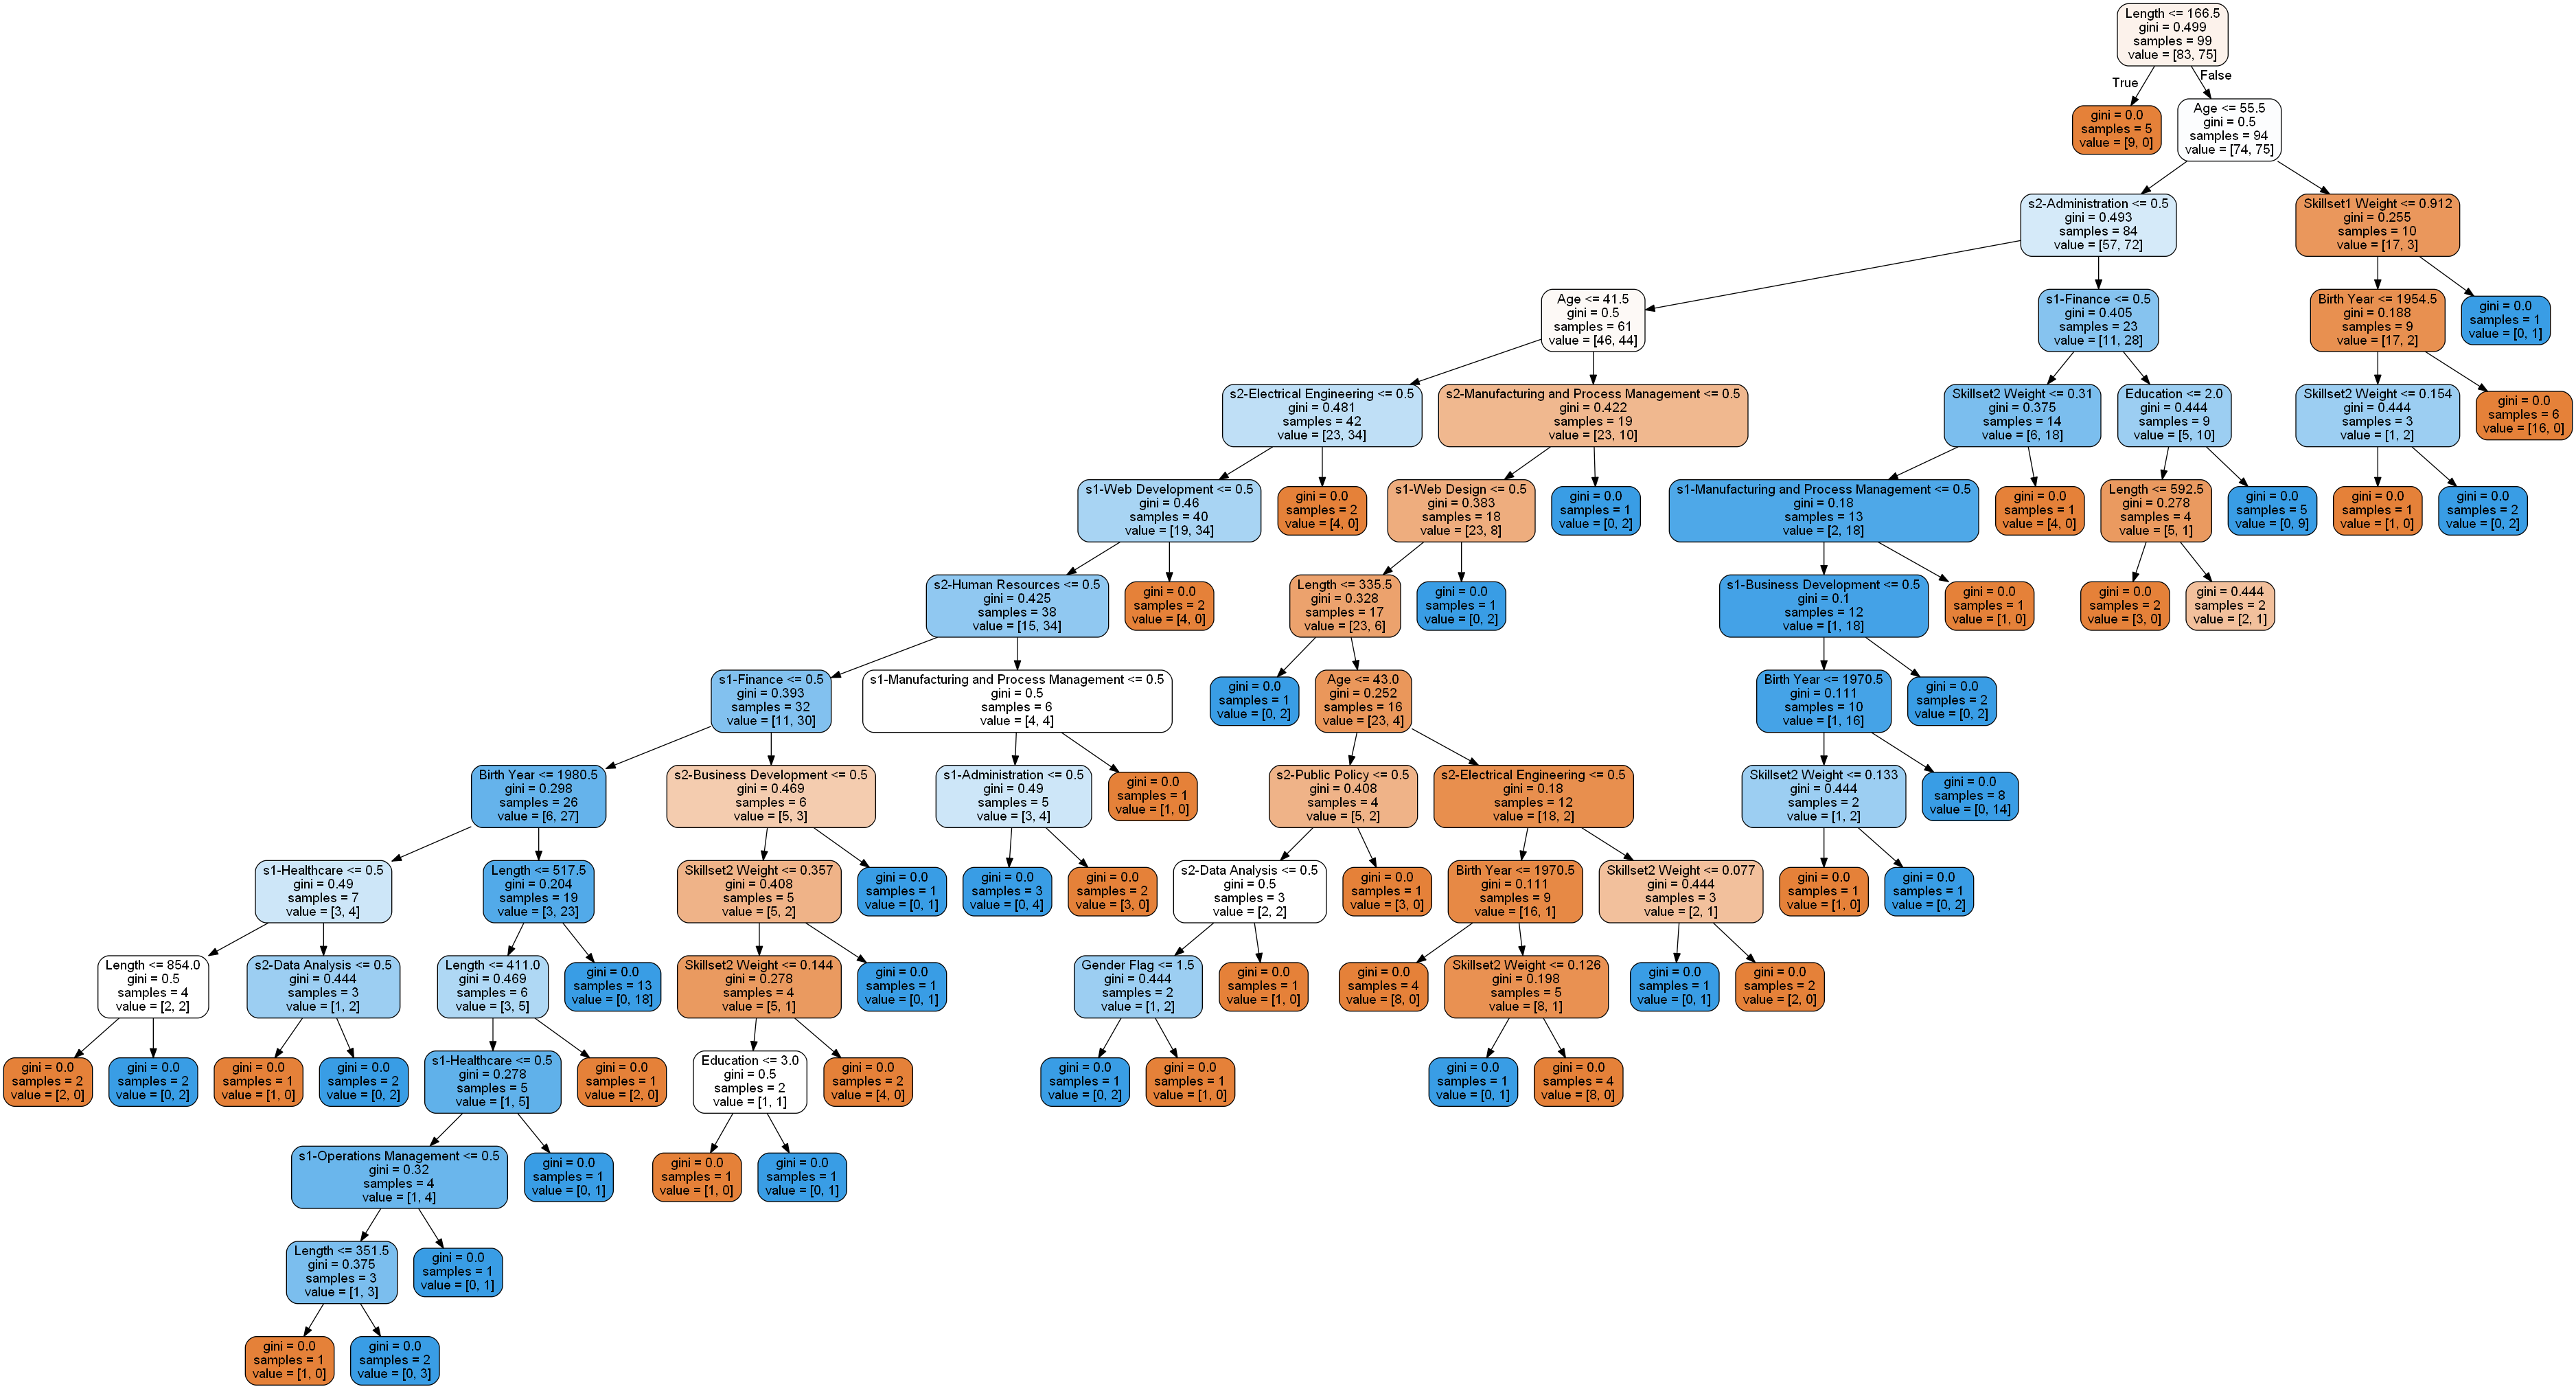

In [15]:
import collections
import pydotplus
import pydot

from sklearn.tree import DecisionTreeClassifier, export_graphviz
dot_data = export_graphviz(RF.estimators_[60],
                                feature_names=X_train.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydot.graph_from_dot_data(dot_data)



graph[0].write_png('tree_finance.png')

from IPython.display import Image
from IPython.core.display import HTML 
Image(r"C:\Users\Rohit\tree_finance.png",width=1200,height=1200)